# Thinkful Challenge # 1: "What Do You See?" 
1. Pick a data source from https://github.com/Thinkful-Ed/data-201-resources/blob/master/data-sources.md.
2. Load the data into a pandas data frame.
3. Generate a series of visuals (at least 4 different visuals). 
4. Use subplots (at least once).
5. Each visualization should be accompanied by 2-3 sentences describing what you think is revealed by this representation.

## Kaggle Data Source: US Mass Shootings (Version 5)
Mass Shootings in the United States of America (1966-2017)

Geography: United States of America

Time period: 1966-2017

Unit of analysis: Mass Shooting Attack

Dataset: The dataset contains detailed information of 398 mass shootings in the United States of America that killed 1996 and injured 2488 people.

Variables: The dataset contains Serial No, Title, Location, Date, Summary, Fatalities, Injured, Total Victims, Mental Health Issue, Race, Gender, and Lat-Long information.

### Loading data into data frame

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
msd = pd.read_csv("MassShootingDataset.csv",encoding='latin-1')
msd.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [18]:
msd["Date"] = pd.to_datetime(msd["Date"])
msd.head(1)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN


### Create Month and Year Columns

In [84]:
import calendar
msd["Month"] = pd.DatetimeIndex(msd['Date']).month
msd["Year"] = pd.DatetimeIndex(msd['Date']).year
msd.head(1)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Month,Year
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,26,NaN,NaN,No,White,M,NaN,NaN,11,2017


### Looking for Correlations (Data Visual #1)

#### A) Pairplot (Seaborn)

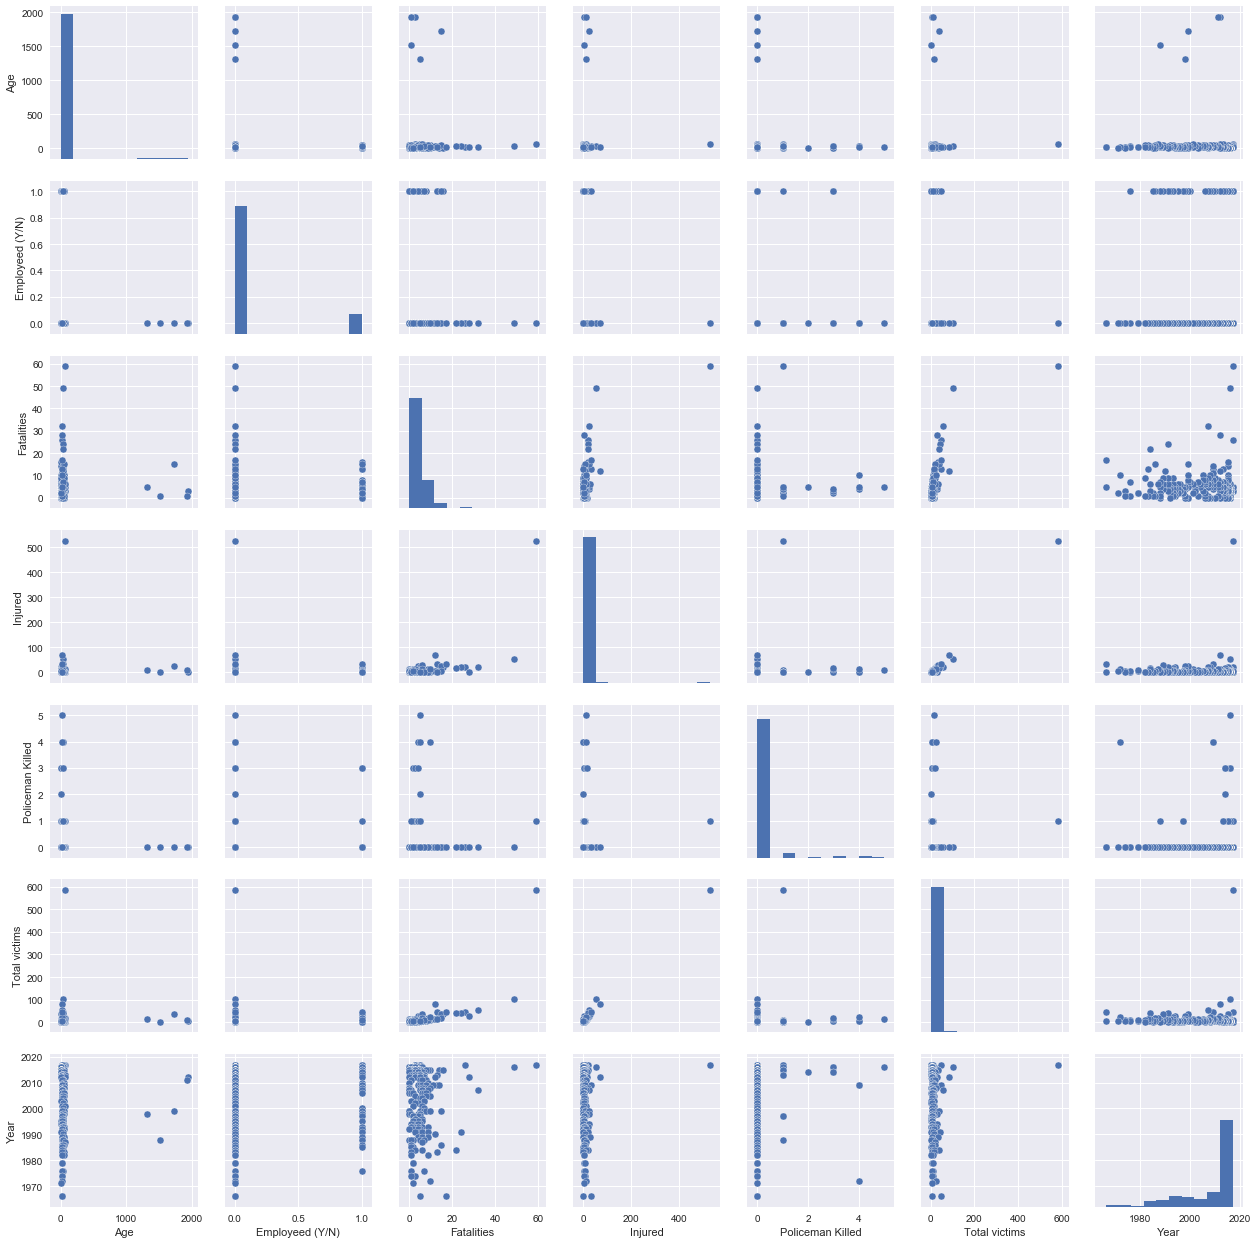

In [106]:
sns.set()
def convert_str(data):
    if type(data) is int:
        return data
    elif type(data) is float:
        return data
    return int(data.replace(',',''))
msd["Age"] = msd["Age"].apply(convert_str)
msd_col = msd[["Age","Employeed (Y/N)","Fatalities","Injured","Policeman Killed","Total victims","Month","Year"]]
msd_col = msd_col.fillna(0)
g = sns.pairplot(msd_col)

#### B) Heatmap (Seaborn)

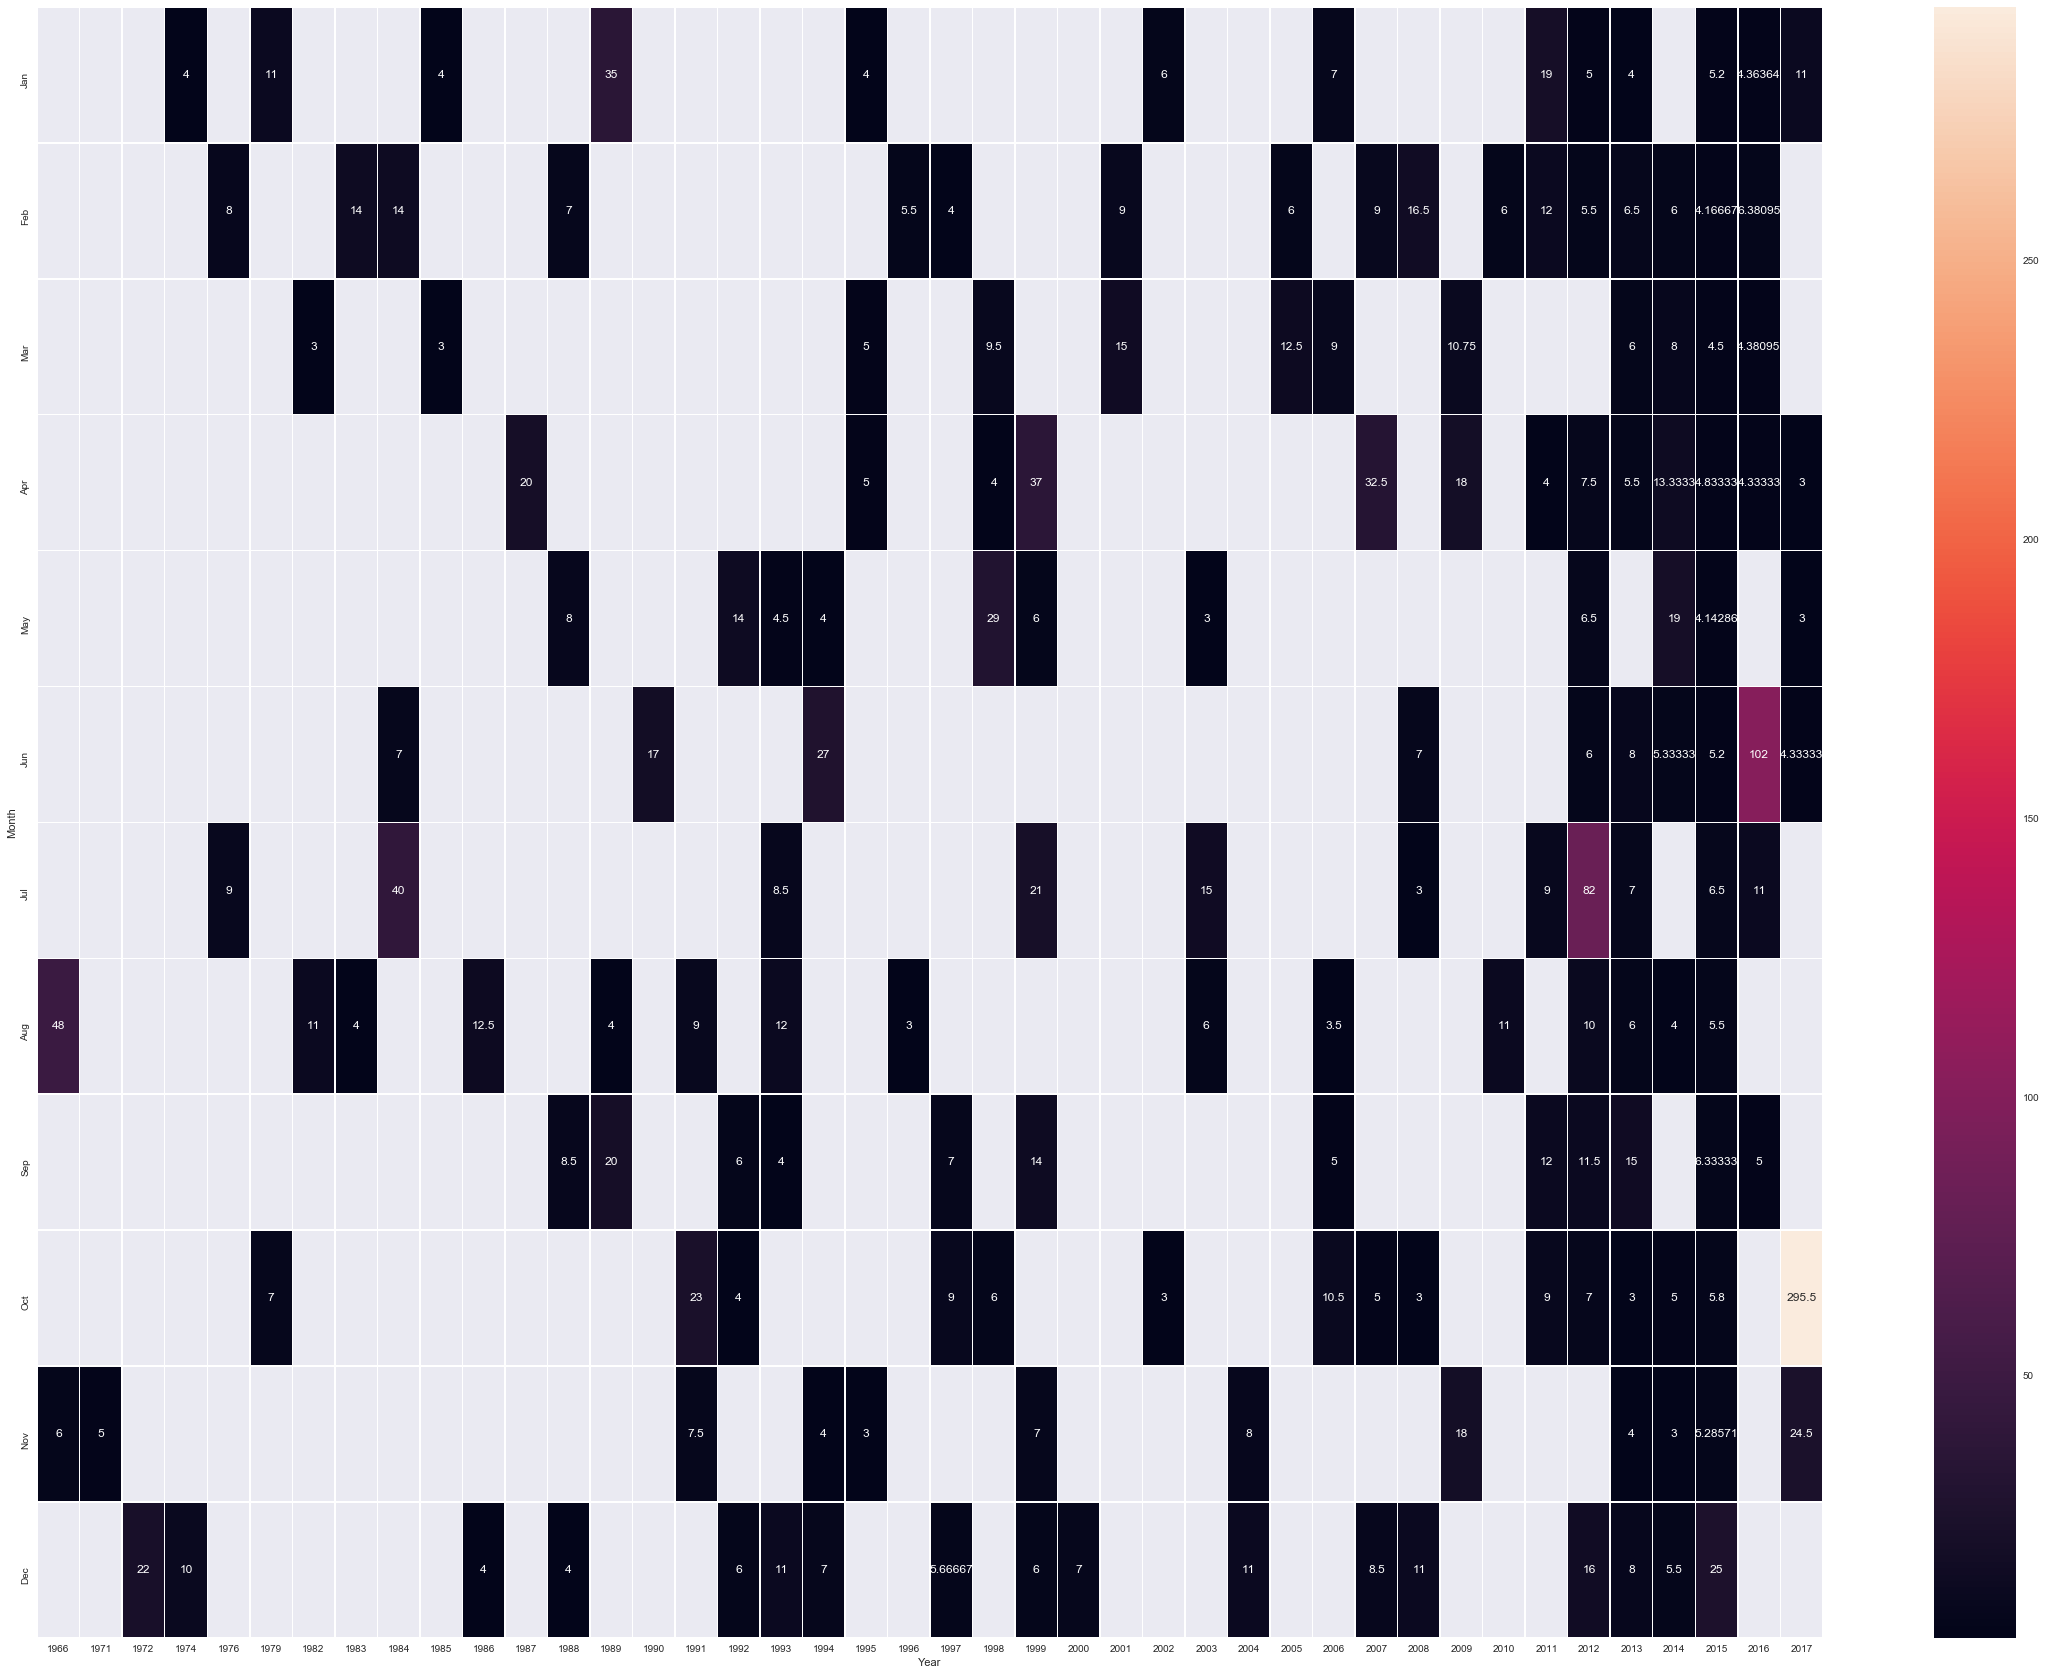

In [88]:
fig,ax = plt.subplots(figsize=(40,30))
msd["Month"] = msd["Month"].apply(lambda x: calendar.month_abbr[x])
months = []
for index in range(12):
    months.append(calendar.month_abbr[index+1])
msd_corr = msd.pivot_table(index="Month",columns="Year",values="Total victims")
msd_corr = msd_corr.reindex(months)
ax = sns.heatmap(msd_corr,annot=True,fmt="g",linewidths=.5,ax=ax)
plt.show()

The pairplot graphs suggest the following:
1. There is a large concentration of fatalities in the 2010-2020 region (Fatalities vs. Years)
2. There exists a positive correlation between Fatalities and Total Victims and Injured
3. There is a weak positive correlation between Fatalities and Years, as well as Total Victims and Years

The heatmap suggests the following:
1. The frequency of total victims from mass shootings dramatically increases after 2011
2. The number of consecutive months in which a mass shooting occurs increased dramatically after 2011
3. The largest victim concentrations (more than 40 victims) occur between June and October of any given year


### Line Plot (Data Visual #2)

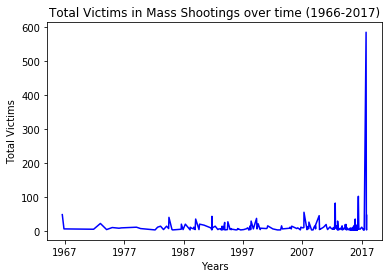

In [13]:
plt.plot(msd["Date"],msd["Total victims"],color="blue")
plt.xlabel("Years")
plt.ylabel("Total Victims")
plt.title("Total Victims in Mass Shootings over time (1966-2017)")
plt.show()

The line graph shows very little fluctuation in the number of vicitms in mass shootings between 1966-2007. However, after 2007, the number of victims increases with the largest number occuring in 2017. This is due to the mass shooting incident in Las Vegas on October 1, 2017 (585 total victims). 

### Histogram (Data Visual #3)

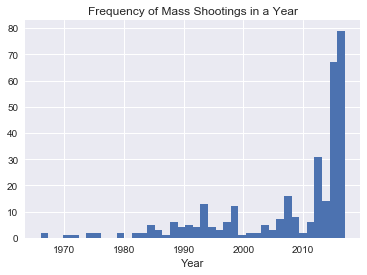

In [98]:
plt.hist(msd["Year"],bins=40)
plt.xlabel("Year")
plt.title("Frequency of Mass Shootings per Year")
plt.show()

The histogram plot displays the number of times a year appears according to the number of mass shootings that occur within that year. The data suggests that the number of mass shootings has been gradually increasing in frequency since 1967. However, after 2010, the frequency increases dramatically with the highest number of shootings occuring around 2016-2017. 

### Boxplot (Data Visual #4)

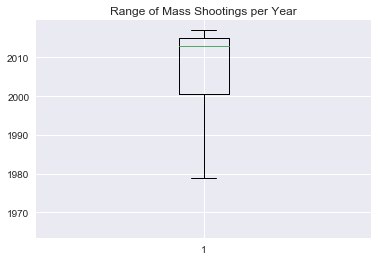

In [110]:
plt.boxplot(msd["Year"])
plt.title("Range of Mass Shootings per Year")
plt.show()

The boxplot shows the distribution of mass shootings per year. According to the diagram:
1. The minimum number of mass shootings occurs before 1980.
2. The max number of mass shootings occurs after 2010.
3. The median number of mass shootings occurs after 2010 (around 2011-2012).
4. The interquartile range lies between 2000 and about 2015. 